Apply 1. logistic Regression 2. SVM 3.Decision Tree 4.RandomForest on the Loan dataset and check where you will get the best possible accuracy project note : Dependent Variable is Loan Status


In [1]:
import pandas as pd

In [2]:
loan_data=pd.read_csv('loan.csv')

In [3]:
loan_data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [4]:
loan_data.drop(['Loan_ID'], axis =1, inplace = True)

In [5]:
loan_data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [6]:
loan_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [8]:
loan_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
for col in loan_data.columns:
    if loan_data[col].dtype == 'object':
        loan_data[col] = le.fit_transform(loan_data[col])
    else:
        loan_data[col] = loan_data[col].astype(float)

In [12]:
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106.0,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072.0,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583.0,0.0,187.0,360.0,1.0,2,1


In [13]:
loan_data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
loan_data=loan_data.dropna()

In [15]:
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417.0,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106.0,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072.0,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583.0,0.0,187.0,360.0,1.0,2,1


In [16]:
loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
x = loan_data.drop(['Loan_Status'], axis = 1).values

In [18]:
x

array([[  1.,   1.,   1., ..., 360.,   1.,   0.],
       [  1.,   1.,   0., ..., 360.,   1.,   2.],
       [  1.,   1.,   0., ..., 360.,   1.,   2.],
       ...,
       [  1.,   1.,   1., ..., 360.,   1.,   2.],
       [  1.,   1.,   2., ..., 360.,   1.,   2.],
       [  0.,   0.,   0., ..., 360.,   0.,   1.]])

In [19]:


y=loan_data['Loan_Status'].values

In [20]:
y

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=50)


In [22]:
# LogisticRegression


In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
reg = LogisticRegression()

In [25]:
reg.fit(x_train, y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_pred_reg = reg.predict(x_test)

In [27]:
y_pred_reg 

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [28]:
from sklearn.metrics import r2_score, accuracy_score, classification_report

In [29]:
r2_score(y_test,y_pred_reg)

0.13398692810457535

In [30]:
log_accuracy = accuracy_score(y_test,y_pred_reg)
log_accuracy

0.8113207547169812

In [31]:

classification_report(y_test,y_pred_reg)

'              precision    recall  f1-score   support\n\n           0       0.94      0.44      0.60        34\n           1       0.79      0.99      0.88        72\n\n    accuracy                           0.81       106\n   macro avg       0.86      0.71      0.74       106\nweighted avg       0.84      0.81      0.79       106\n'

In [32]:
set(y)

{0, 1}

In [33]:
import numpy as np
colorset = np.array(['blue', 'pink'])

Text(0, 0.5, 'y_train')

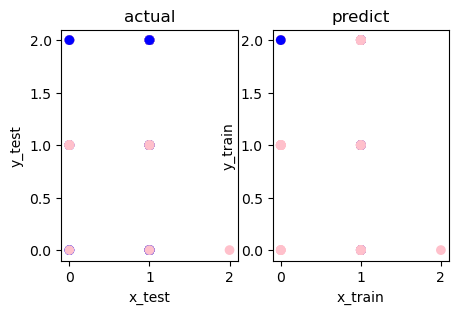

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,3))

plt.subplot( 1, 2, 1)
plt.scatter(x_test[: ,0], x_test[: , -1], c = colorset[y_test])
plt.title('actual')
plt.xlabel('x_test')
plt.ylabel('y_test')

plt.subplot(1,2,2)
plt.scatter(x_test[: ,0], x_test[: , -1], c = colorset[y_pred_reg])
plt.title('predict')
plt.xlabel('x_train')
plt.ylabel('y_train')


In [35]:
#svm

In [36]:
from sklearn.svm import SVC

In [37]:
clsf =  SVC(kernel = 'linear')
#clsf = SVC(kernel = 'poly')
#clsf = SVC(kernel = 'rbf')
#clsf = SVC(kernel = 'sigmoid')

In [38]:
clsf.fit(x_train,y_train)

SVC(kernel='linear')

In [39]:
y_pred_svc = clsf.predict(x_test)

In [41]:
svc_accuracy = accuracy_score(y_test,y_pred_reg)
svc_accuracy

0.8113207547169812

In [42]:
#decision tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dec_tree_cls = DecisionTreeClassifier(criterion= 'entropy')

In [45]:
dec_tree_cls.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [46]:
y_pred_dec = dec_tree_cls.predict(x_test)

In [47]:
y_pred_dec

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [48]:
dec_score = accuracy_score(y_test,y_pred_dec)
dec_score 

0.7264150943396226

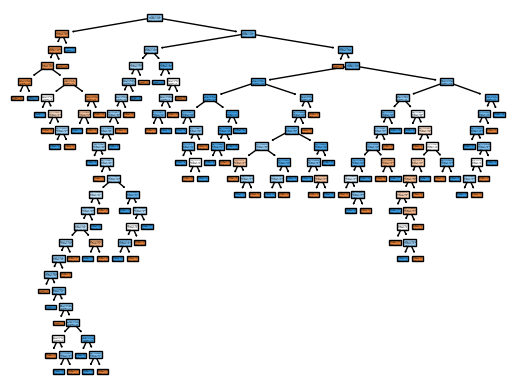

In [49]:
from sklearn import tree
tree.plot_tree(dec_tree_cls, filled = True)

import matplotlib.pyplot as plt
plt.show()

In [50]:
#random forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rand_clsf = RandomForestClassifier( criterion='entropy',n_estimators=100)

In [53]:
rand_clsf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [54]:
y_pred_rand = rand_clsf.predict(x_test)

In [55]:
y_pred_rand

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [56]:
rand_score = accuracy_score(y_test,y_pred_rand)
rand_score

0.8018867924528302

In [57]:
#rand_clsf.estimators_ 

In [58]:
len(rand_clsf.estimators_ )

100

In [59]:
from sklearn import tree

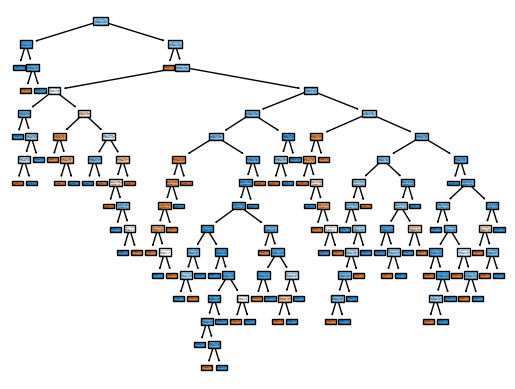

In [60]:
tree.plot_tree(rand_clsf.estimators_[99], filled = True)
plt.show()

In [61]:
dec_score 

0.7264150943396226

In [62]:
rand_score

0.8018867924528302

Text(0, 0.5, 'random forest score')

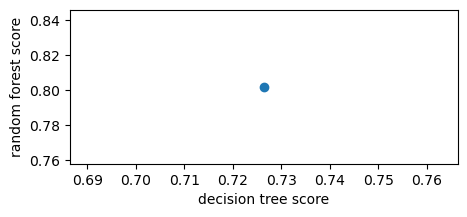

In [63]:
plt.figure(figsize = (5,2))
plt.plot(dec_tree_cls.score(x_test,y_test), rand_clsf.score(x_test, y_test), marker = 'o')
plt.xlabel('decision tree score')
plt.ylabel('random forest score')

In [67]:
print(f"Accuracy rate of Logistic Regression is",log_accuracy*100)
print(f"Accuracy rate of SVC is",svc_accuracy*100)
print(f"Accuracy rate of Decision Tree is",dec_score*100)
print(f"Accuracy rate of RandomForest Tree is",rand_score*100)

Accuracy rate of Logistic Regression is 81.13207547169812
Accuracy rate of SVC is 81.13207547169812
Accuracy rate of Decision Tree is 72.64150943396226
Accuracy rate of RandomForest Tree is 80.18867924528303


Conclusion:
Logistic Regression and SVC share the highest and same accuracy rate of 81.13% preceeded by random forest with 80.18% followed by Decision Tree with 72.64%